<a href="https://colab.research.google.com/github/madch3m/Data-Science-MachineLearning/blob/master/Spam_Message_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libaries for data preprocessing step

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Read in data from file 

In [3]:
df =pd.read_csv('/spam.tsv', sep='\t')

Identify attributes of Data

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df['label'].value_counts() / (len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label']=='spam']

In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [14]:
data = ham.append(spam,ignore_index=True)

In [15]:
data.shape

(1494, 4)

In [16]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [17]:
data.head()

,label,message,length,punct
0,ham,Gud ni8.swt drms.take care,26,2
1,ham,Hello beautiful r u ok? I've kinda ad a row wi...,106,4
2,ham,I've reached already.,21,2
3,ham,Haiyoh... Maybe your hamster was jealous of mi...,51,3
4,ham,Congrats kano..whr s the treat maga?,36,3


In [18]:
data.describe()

,length,punct
count,1494.000000,1494.000000
mean,104.121151,4.730924
std,56.128089,3.924252
min,2.000000,0.000000
25%,48.000000,2.000000
50%,119.500000,4.000000
75%,153.000000,7.000000
max,458.000000,42.000000


Data Exploration

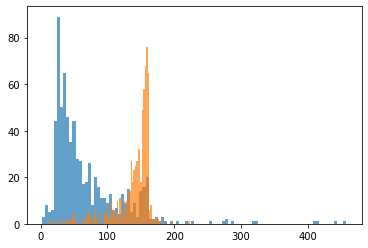

In [21]:
plt.hist(data[data['label'] == 'ham']['length'], bins= 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins= 100, alpha = 0.7)
plt.show()

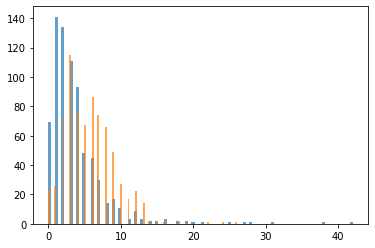

In [24]:
plt.hist(data[data['label'] == 'ham']['punct'], bins= 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins= 100, alpha = 0.7)
plt.show()

In [25]:
data

,label,message,length,punct
0,ham,Gud ni8.swt drms.take care,26,2
1,ham,Hello beautiful r u ok? I've kinda ad a row wi...,106,4
2,ham,I've reached already.,21,2
3,ham,Haiyoh... Maybe your hamster was jealous of mi...,51,3
4,ham,Congrats kano..whr s the treat maga?,36,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


SPLIT TRAIN AND TEST DATA FOR MODEL VALIDATION

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'], test_size = 0.3, random_state=0, shuffle = True)

In [28]:
X_train.shape

(1045,)

In [29]:
X_test.shape

(449,)

IMPORT MODELS TO CLASSIFY DATA

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [31]:
classifier = Pipeline([('tfidf',TfidfVectorizer()),('classifier', RandomForestClassifier(n_estimators=10))])

In [32]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [34]:
y_pred =classifier.predict(X_test)

In [35]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam', 'spam',
        'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'sp

MODEL EVALUATION

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [37]:
accuracy_score(y_test, y_pred)

0.9265033407572383

In [38]:
confusion_matrix(y_test,y_pred)

array([[223,   4],
       [ 29, 193]])

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.98      0.93       227
        spam       0.98      0.87      0.92       222

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



In [42]:
from sklearn.svm import SVC

In [43]:
svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C= 100, gamma = 'auto'))])

In [44]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [45]:
y_pred = svm.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.9443207126948775

In [47]:
confusion_matrix(y_test,y_pred)

array([[222,   5],
       [ 20, 202]])

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [49]:
test1 = ['Hello, You are learning nautral Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [51]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
